In [ ]:
import sys
sys.path.append("../src")

from data_loader import DataLoader
from technical_indicator import TechnicalIndicator

import pandas as pd


In [ ]:
loader = DataLoader("../data/data")
stocks = loader.load_all_stocks()

stocks.keys()


In [ ]:
stocks["AAPL"].head()


In [ ]:
stocks["AMZN"].head()


In [ ]:
stocks["GOOG"].head()


In [ ]:
stocks["META"].head()


In [ ]:
stocks["MSFT"].head()


In [ ]:
stocks["NVDA"].head()


In [ ]:
import importlib
import technical_indicator
importlib.reload(technical_indicator)

from technical_indicator import TechnicalIndicator


In [ ]:
indicator = TechnicalIndicator()
stocks_with_indicators = indicator.apply_to_all(stocks)
stocks_with_indicators["AAPL"].tail()




In [ ]:
stocks_with_indicators["AMZN"].tail()

In [ ]:
stocks_with_indicators["GOOG"].tail()

In [ ]:
stocks_with_indicators["META"].tail()

In [ ]:
stocks_with_indicators["MSFT"].tail()

In [ ]:
stocks_with_indicators["NVDA"].tail()

In [ ]:
import matplotlib.pyplot as plt

df = stocks_ta["AAPL"]

plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close")
plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
plt.legend()
plt.title("AAPL Price & Moving Averages")
plt.show()


In [ ]:
# Apply PyNance Financial Metrics - WORKING VERSION
print("📊 Applying PyNance Financial Metrics to All Stocks...")
print("=" * 60)

from pynance_metrics import calculate_pynance_metrics

total_metrics_added = 0
successful_stocks = []

for ticker, df in stocks_with_indicators.items():
    try:
        print(f"\n🔧 Processing {ticker}...")
        
        # Calculate PyNance metrics
        pynance_calc = calculate_pynance_metrics(df)
        stocks_with_indicators[ticker] = pynance_calc.data
        
        metrics_count = len(pynance_calc.metrics)
        total_metrics_added += metrics_count
        successful_stocks.append(ticker)
        
        print(f"✅ {ticker}: {metrics_count} PyNance metrics added")
        
        # Show sample of what was calculated
        if metrics_count > 0:
            latest_metrics = pynance_calc.get_latest_metrics()
            if not latest_metrics.empty:
                print(f"   Sample metrics (latest values):")
                sample_metrics = latest_metrics.head(3)
                for metric, row in sample_metrics.iterrows():
                    print(f"     • {metric}: {row['Latest_Value']:.4f}")
                    
    except Exception as e:
        print(f"❌ {ticker}: Error - {e}")

print(f"\n🎯 PYTHONANCE METRICS COMPLETED!")
print("=" * 50)
print(f"✅ Successful: {len(successful_stocks)} stocks")
print(f"✅ Total Metrics Added: {total_metrics_added}")
print(f"✅ Stocks processed: {', '.join(successful_stocks)}")

# Show final verification
print(f"\n🔍 VERIFICATION - Sample data with PyNance metrics:")
sample_ticker = successful_stocks[0] if successful_stocks else list(stocks_with_indicators.keys())[0]
sample_df = stocks_with_indicators[sample_ticker]

pynance_cols = [col for col in sample_df.columns if col.startswith('Pn_')]
print(f"📈 {sample_ticker} has {len(pynance_cols)} PyNance metrics:")
print(f"   {', '.join(pynance_cols)}")

# Show the data with new metrics
display_cols = ['Date', 'Close'] + pynance_cols[:5]  # Show first 5 PyNance metrics
display(sample_df[display_cols].tail(3))

In [ ]:
# Create Comprehensive Visualizations for ALL Stocks
print("🎯 CREATING COMPLETE TECHNICAL ANALYSIS FOR ALL STOCKS")
print("=" * 60)

from visualization import create_visualizations

# This will create dashboards for ALL your stocks (AAPL, AMZN, GOOG, META, MSFT, NFLX, etc.)
create_visualizations(stocks_with_indicators)

print("\n✅ TASK 2 VISUALIZATION PHASE COMPLETED!")

In [58]:
# Cell 1: Check what stocks are available
print("🔍 CHECKING AVAILABLE STOCKS")
print("=" * 40)

# Check what's in your stocks dictionary
print("Stocks in 'stocks' dictionary:")
print(list(stocks.keys()) if 'stocks' in locals() else "'stocks' not found")

print("\nStocks in 'stocks_with_indicators' dictionary:")
print(list(stocks_with_indicators.keys()) if 'stocks_with_indicators' in locals() else "'stocks_with_indicators' not found")

🔍 CHECKING AVAILABLE STOCKS
Stocks in 'stocks' dictionary:
['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']

Stocks in 'stocks_with_indicators' dictionary:
['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [59]:
# Cell 2: Load ALL stocks
print("LOADING ALL STOCKS...")
print("=" * 40)

# Reload all stocks
loader = DataLoader("../data/data")
all_tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NFLX"]

try:
    # Load all stocks
    all_stocks = loader.load_all_stocks(all_tickers)
    print(f"Loaded {len(all_stocks)} stocks: {list(all_stocks.keys())}")
    
    # Apply technical indicators to all stocks
    from technical_indicator import TechnicalIndicator
    indicator = TechnicalIndicator()
    all_stocks_with_indicators = indicator.apply_to_all(all_stocks)
    print(f"Applied technical indicators to all {len(all_stocks_with_indicators)} stocks")
    
    # Apply PyNance metrics to all stocks
    from pynance_metrics import calculate_pynance_metrics
    for ticker, df in all_stocks_with_indicators.items():
        try:
            pynance_calc = calculate_pynance_metrics(df)
            all_stocks_with_indicators[ticker] = pynance_calc.data
            print(f"{ticker}: PyNance metrics added")
        except Exception as e:
            print(f"{ticker}: PyNance error - {e}")
    
    print(f"SUCCESS: All {len(all_stocks_with_indicators)} stocks processed!")
    
except Exception as e:
    print(f"Error loading all stocks: {e}")

LOADING ALL STOCKS...
Error loading all stocks: ../data/data\NFLX.csv not found.


CREATING VISUALIZATIONS FOR ALL STOCKS
Using stocks_with_indicators
Creating dashboards for 6 stocks: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
📊 CREATING TECHNICAL ANALYSIS DASHBOARDS
🎯 PROCESSING ALL 6 STOCKS
📋 STOCKS TO PROCESS: AAPL, AMZN, GOOG, META, MSFT, NVDA

📈 [1/6] ANALYZING AAPL...
🎯 TECHNICAL ANALYSIS DASHBOARD - AAPL


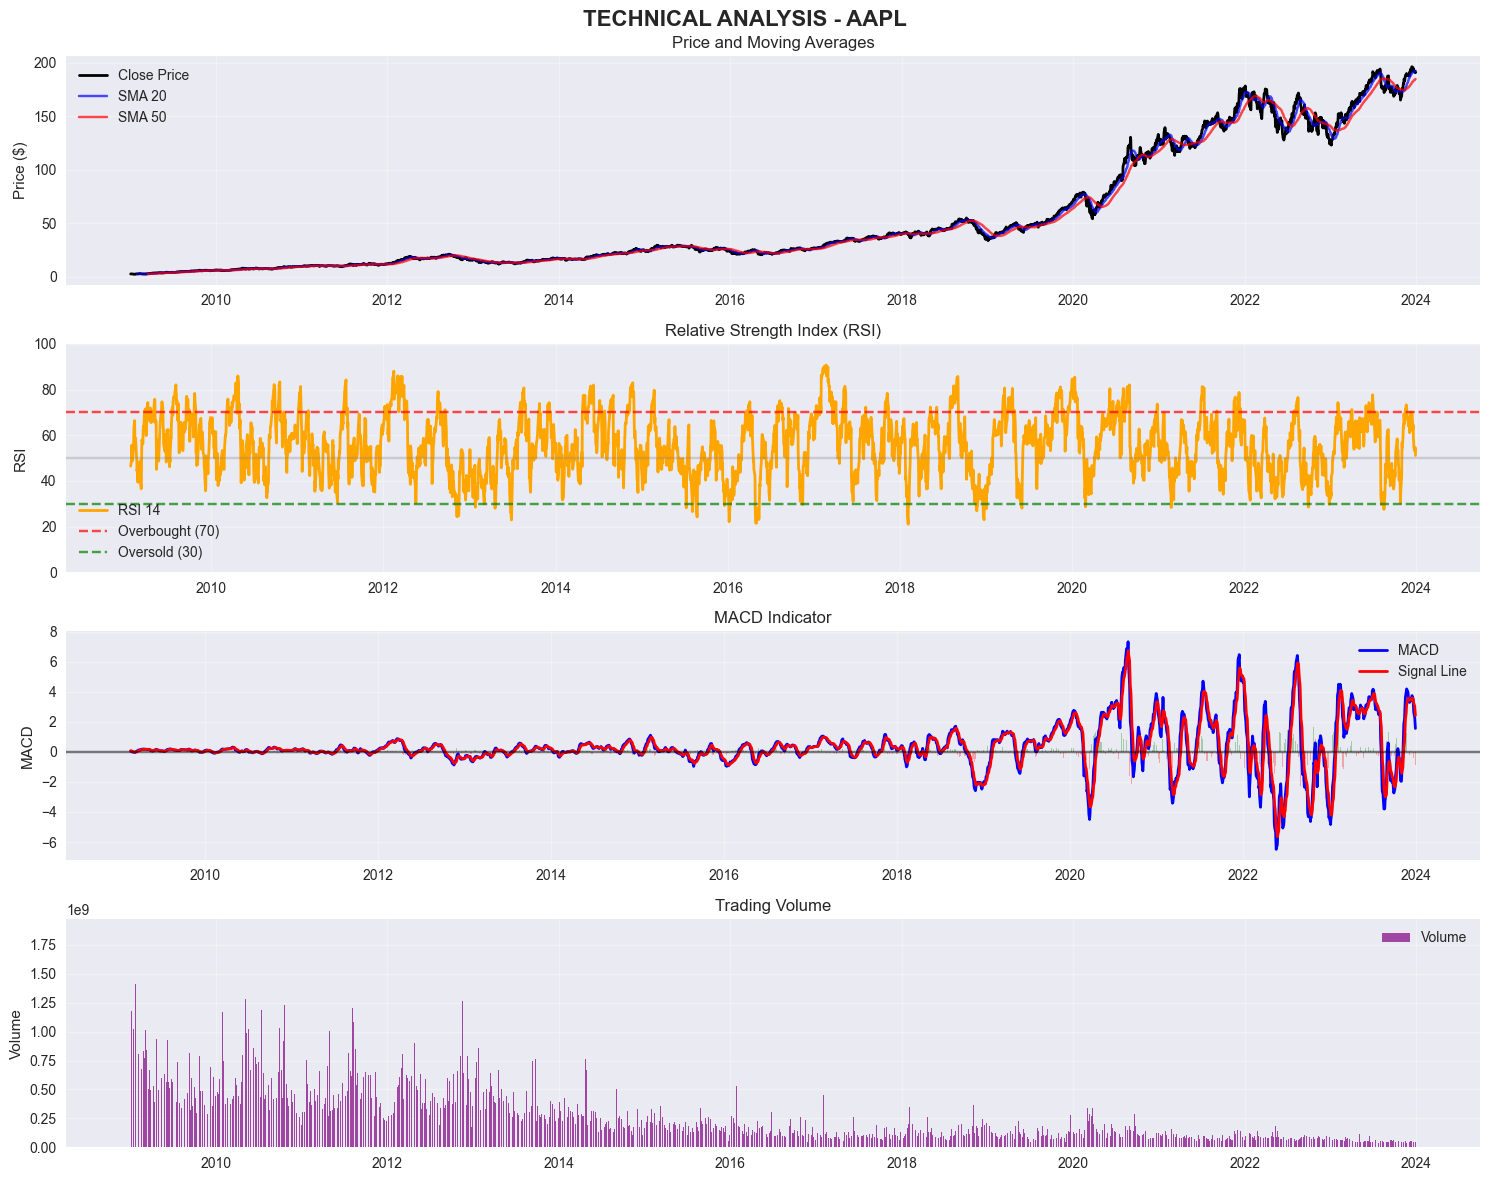

   No PyNance metrics found for AAPL
📈 LATEST INDICATOR VALUES - AAPL
----------------------------------------
💰 Current Price: $190.73
📊 Moving Average Signal: BULLISH
   20-day SMA: $192.49
   50-day SMA: $184.81
🎯 RSI (14): 51.1 - NEUTRAL
📉 MACD Signal: BEARISH
   MACD: 1.560, Signal: 2.425


✅ COMPLETED: AAPL dashboard created

📈 [2/6] ANALYZING AMZN...
🎯 TECHNICAL ANALYSIS DASHBOARD - AMZN


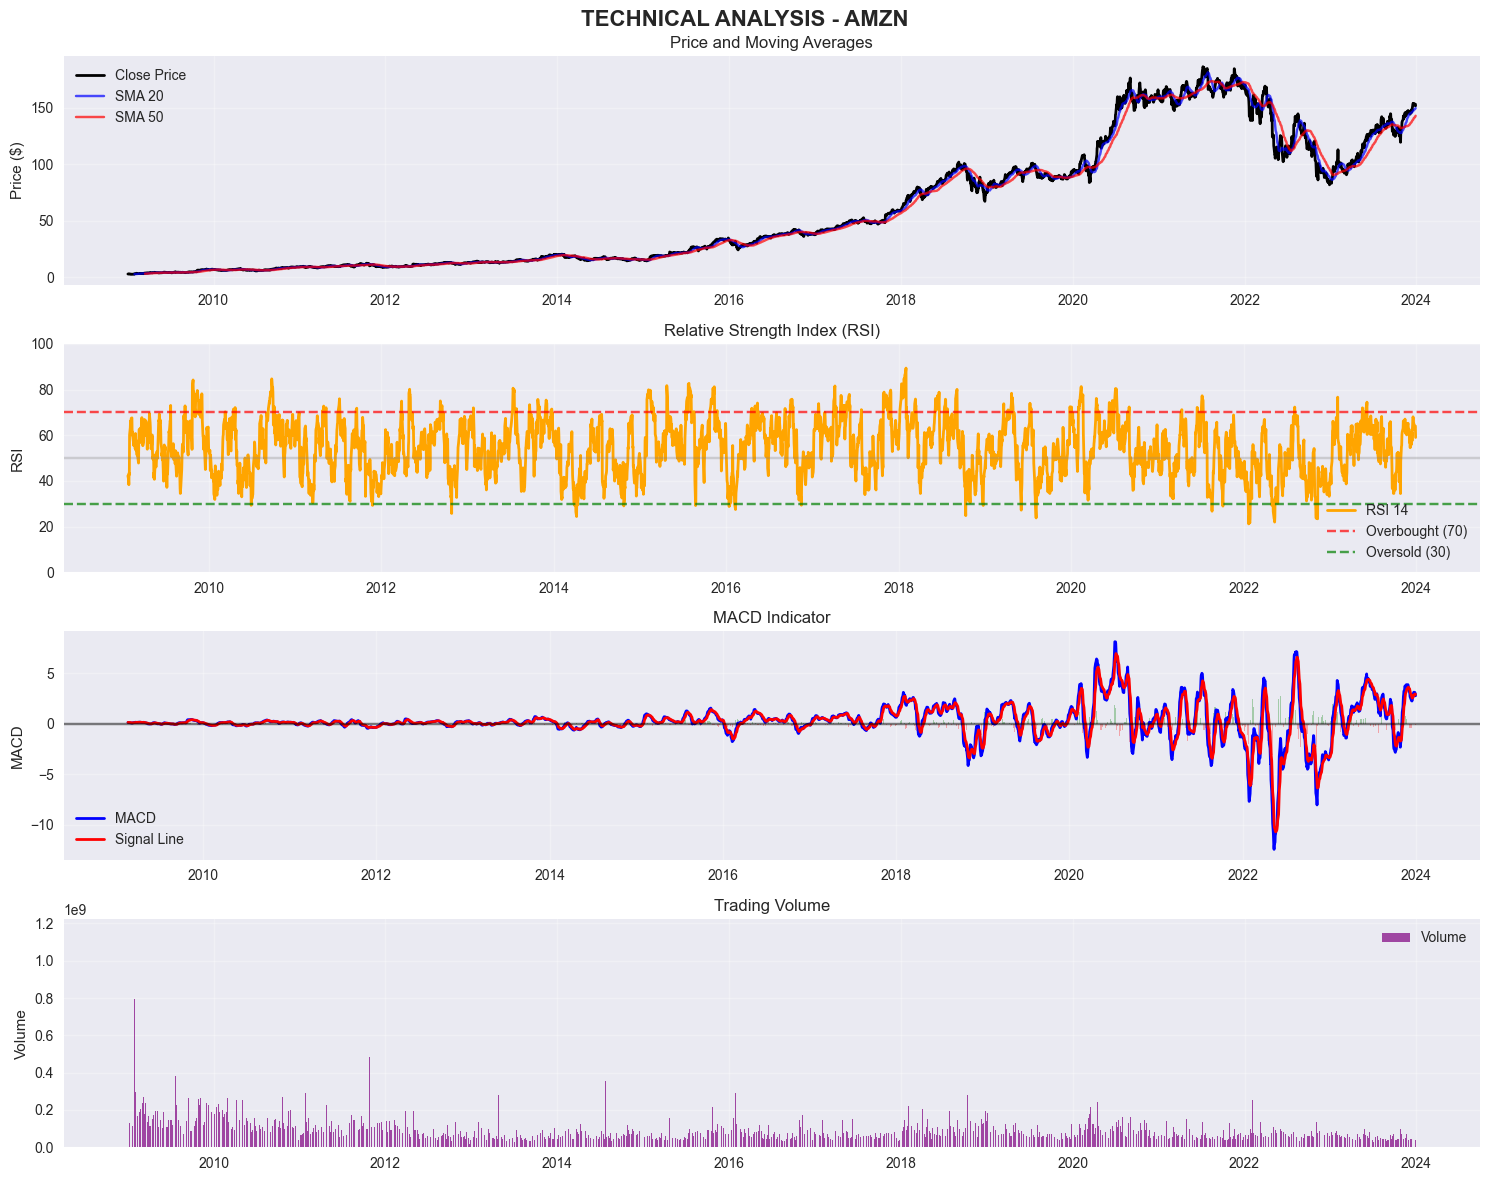

   No PyNance metrics found for AMZN
📈 LATEST INDICATOR VALUES - AMZN
----------------------------------------
💰 Current Price: $151.94
📊 Moving Average Signal: BULLISH
   20-day SMA: $149.82
   50-day SMA: $143.05
🎯 RSI (14): 59.0 - NEUTRAL
📉 MACD Signal: BEARISH
   MACD: 2.782, Signal: 2.923


✅ COMPLETED: AMZN dashboard created

📈 [3/6] ANALYZING GOOG...
🎯 TECHNICAL ANALYSIS DASHBOARD - GOOG


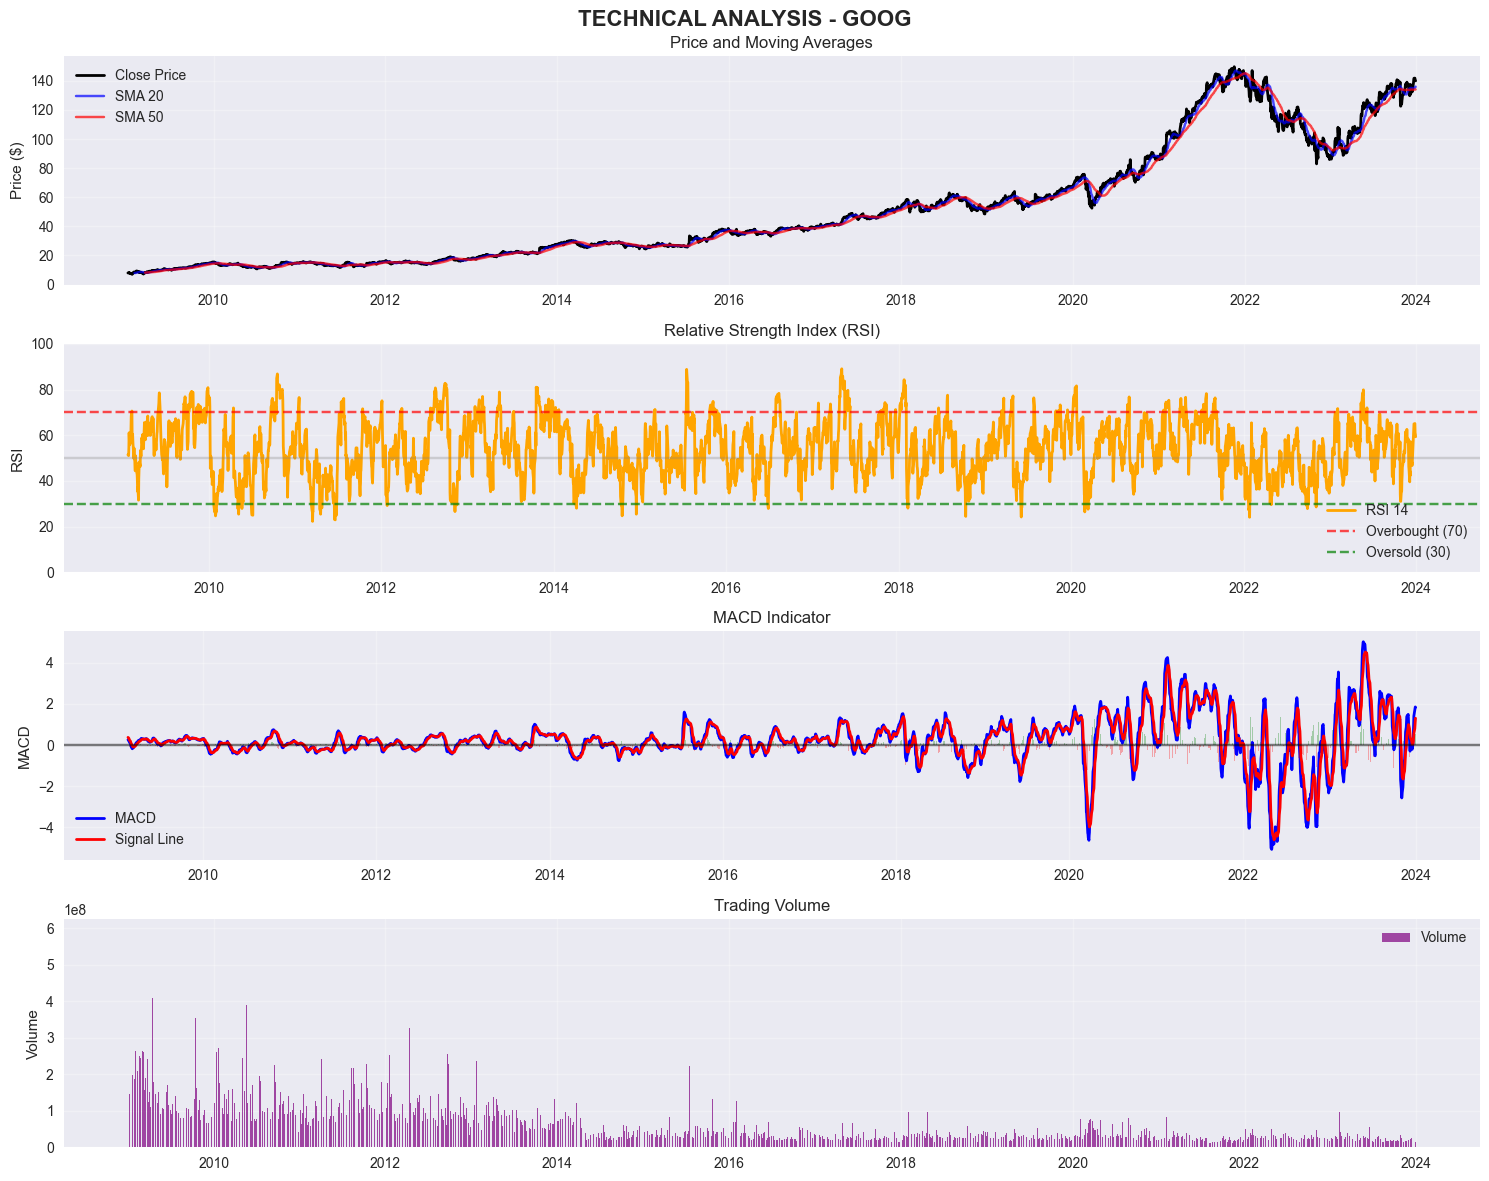

   No PyNance metrics found for GOOG
📈 LATEST INDICATOR VALUES - GOOG
----------------------------------------
💰 Current Price: $139.97
📊 Moving Average Signal: BULLISH
   20-day SMA: $135.98
   50-day SMA: $134.06
🎯 RSI (14): 59.3 - NEUTRAL
📉 MACD Signal: BULLISH
   MACD: 1.843, Signal: 1.306


✅ COMPLETED: GOOG dashboard created

📈 [4/6] ANALYZING META...
🎯 TECHNICAL ANALYSIS DASHBOARD - META


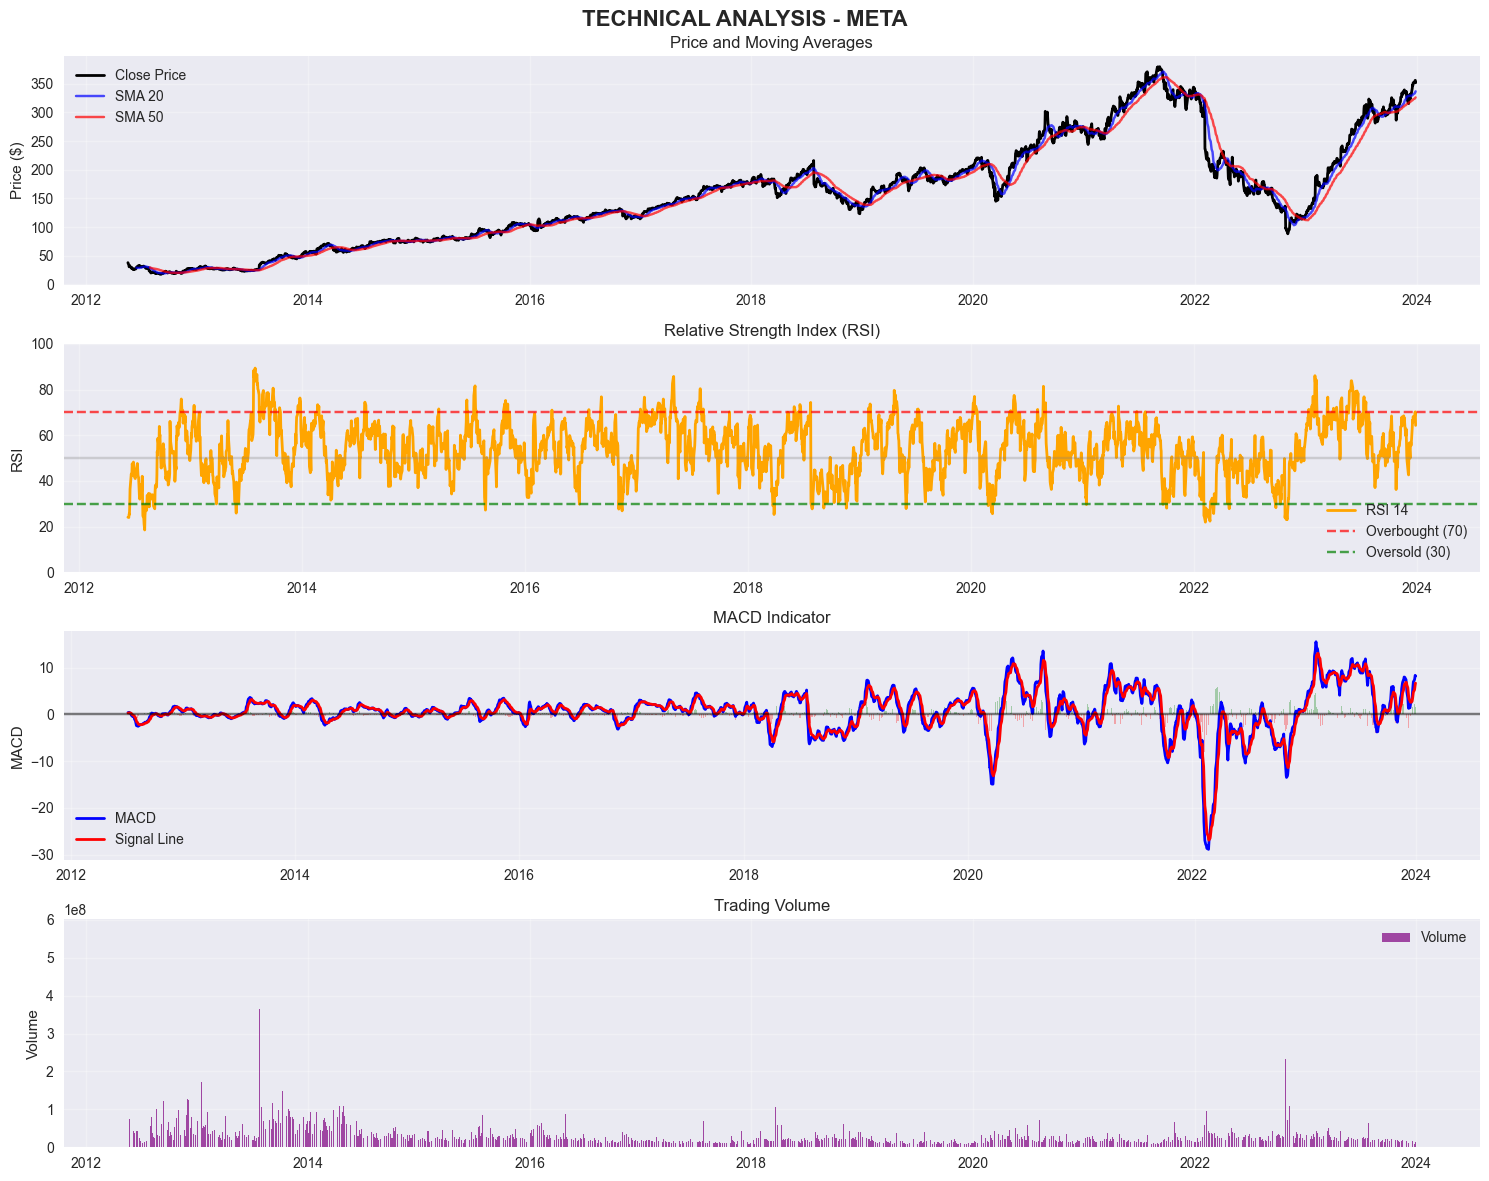

   No PyNance metrics found for META
📈 LATEST INDICATOR VALUES - META
----------------------------------------
💰 Current Price: $351.79
📊 Moving Average Signal: BULLISH
   20-day SMA: $336.87
   50-day SMA: $326.26
🎯 RSI (14): 64.3 - NEUTRAL
📉 MACD Signal: BULLISH
   MACD: 8.193, Signal: 6.693


✅ COMPLETED: META dashboard created

📈 [5/6] ANALYZING MSFT...
🎯 TECHNICAL ANALYSIS DASHBOARD - MSFT


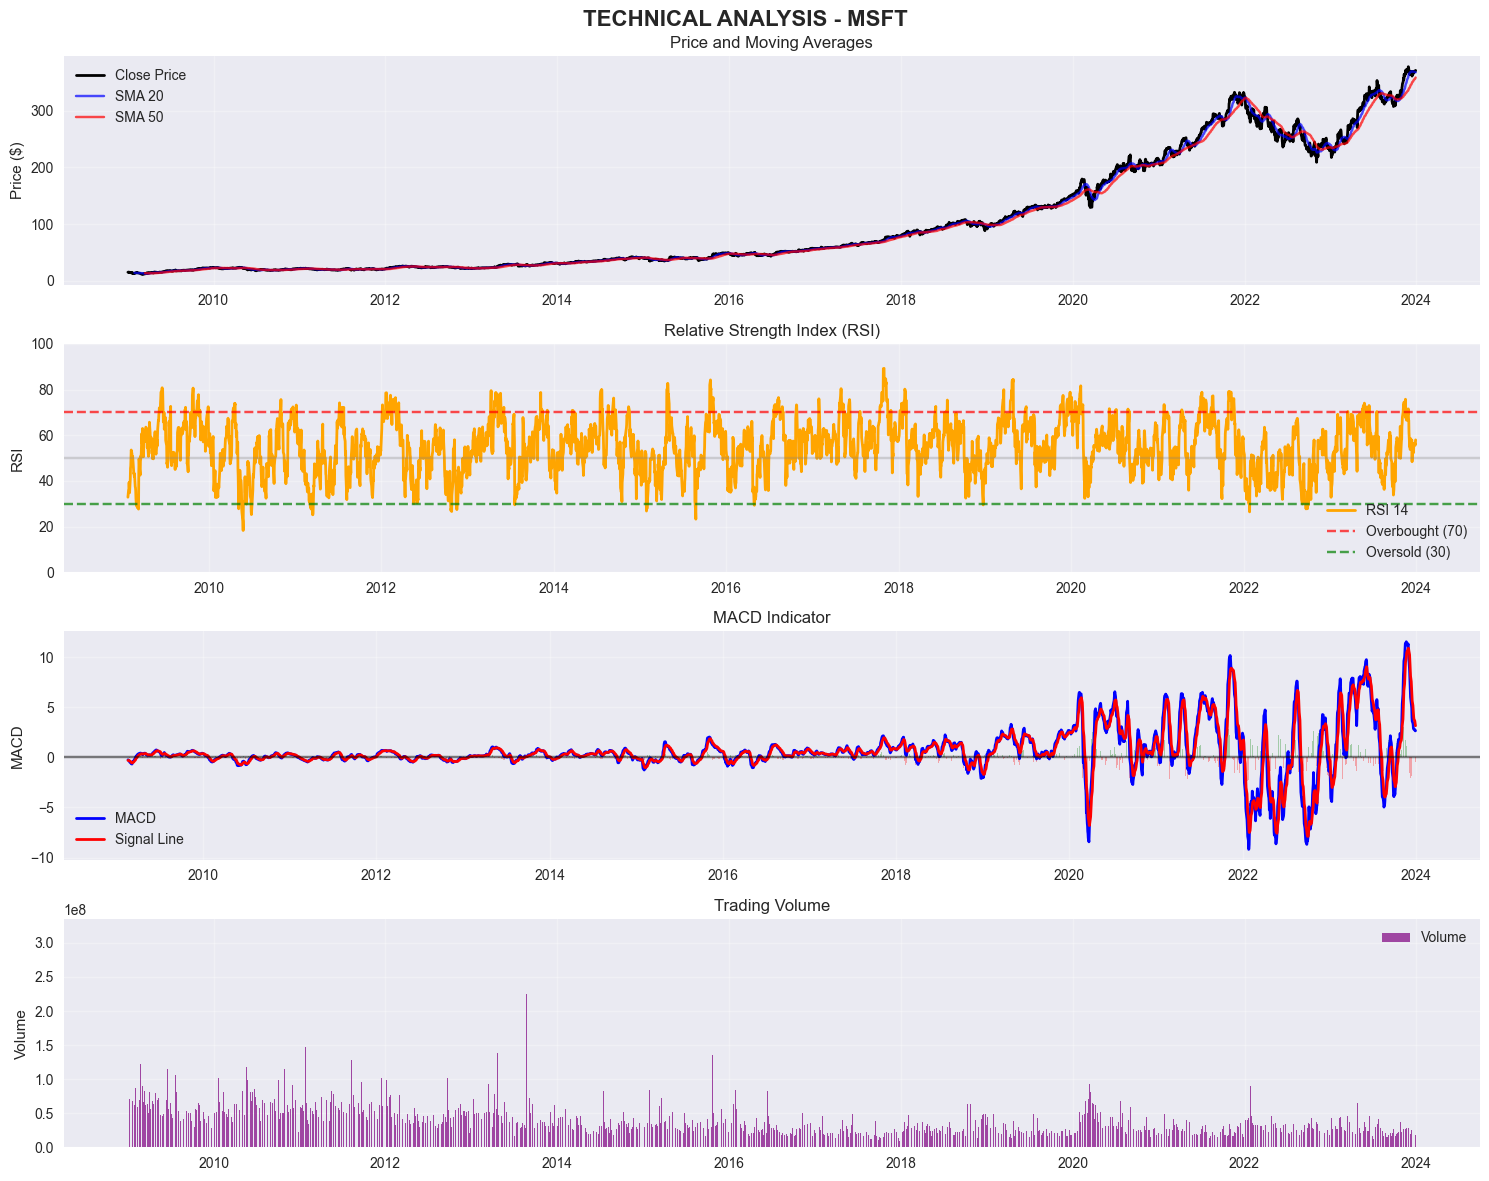

   No PyNance metrics found for MSFT
📈 LATEST INDICATOR VALUES - MSFT
----------------------------------------
💰 Current Price: $371.21
📊 Moving Average Signal: BULLISH
   20-day SMA: $367.79
   50-day SMA: $358.64
🎯 RSI (14): 58.0 - NEUTRAL
📉 MACD Signal: BEARISH
   MACD: 2.654, Signal: 3.150


✅ COMPLETED: MSFT dashboard created

📈 [6/6] ANALYZING NVDA...
🎯 TECHNICAL ANALYSIS DASHBOARD - NVDA


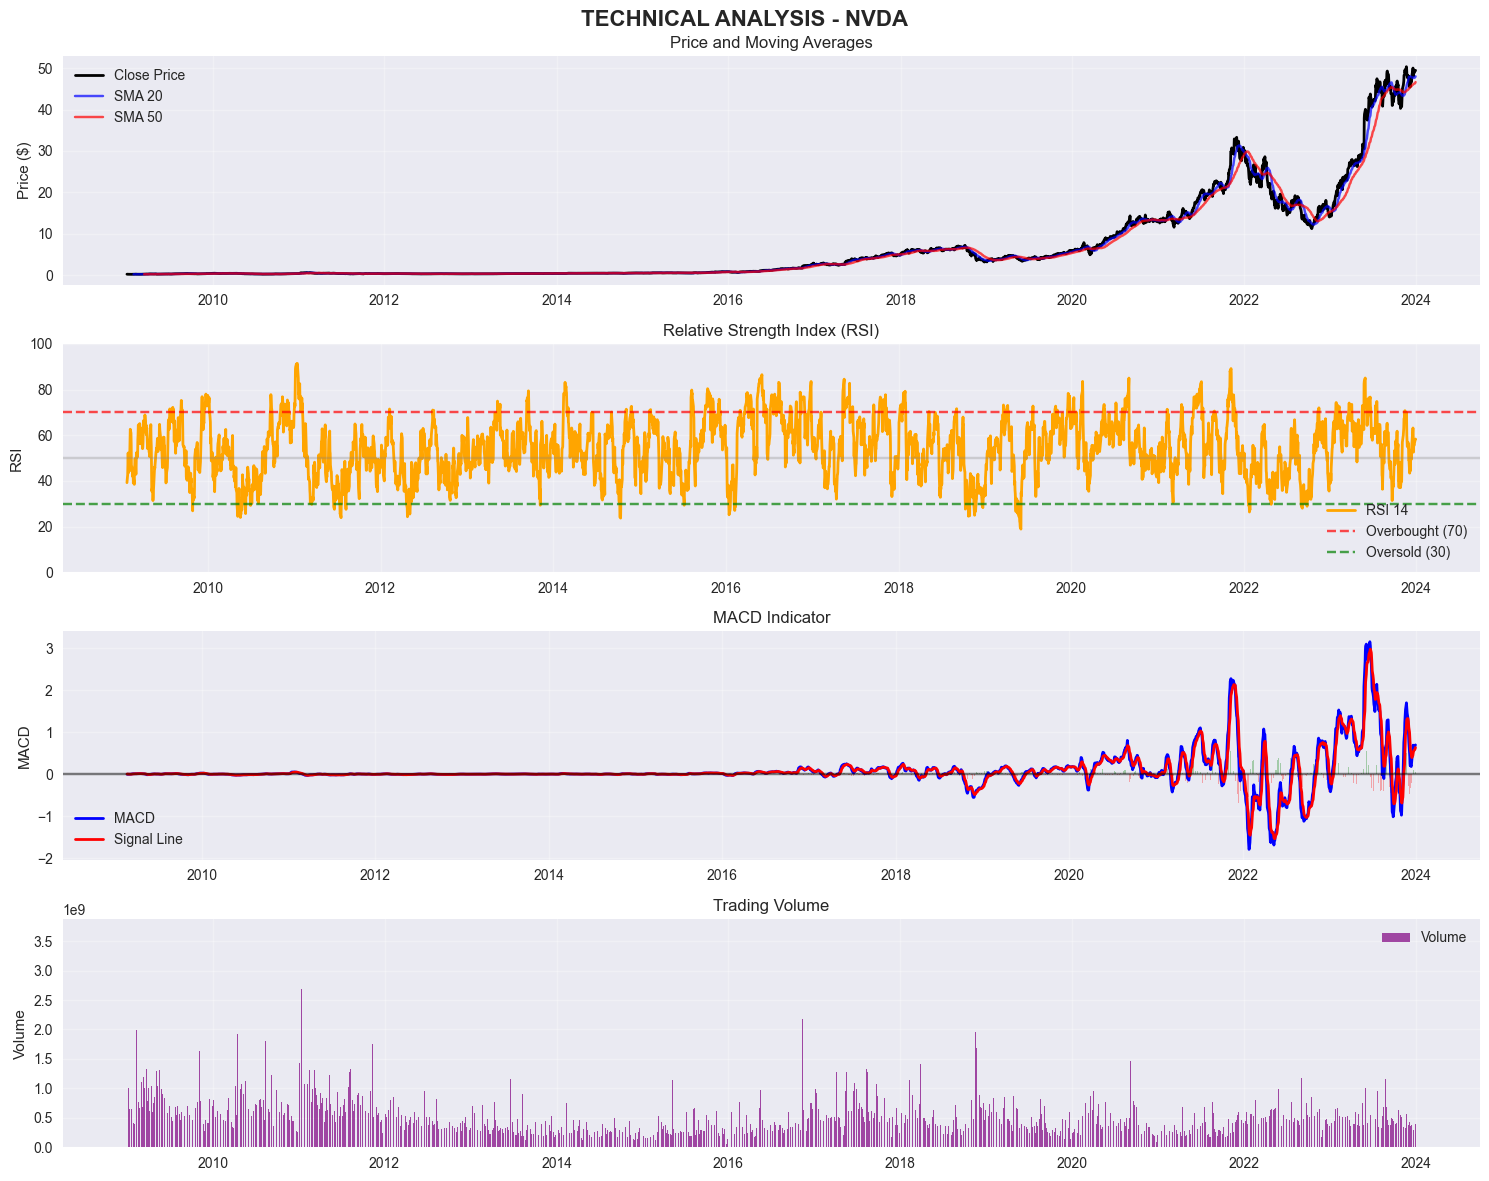

   No PyNance metrics found for NVDA
📈 LATEST INDICATOR VALUES - NVDA
----------------------------------------
💰 Current Price: $49.50
📊 Moving Average Signal: BULLISH
   20-day SMA: $48.05
   50-day SMA: $46.66
🎯 RSI (14): 58.3 - NEUTRAL
📉 MACD Signal: BULLISH
   MACD: 0.698, Signal: 0.635


✅ COMPLETED: NVDA dashboard created

✅ COMPLETED: Technical analysis dashboards created for ALL 6 stocks!
📋 Stocks analyzed: AAPL, AMZN, GOOG, META, MSFT, NVDA

COMPLETED: Visualizations created for ALL 6 stocks!


In [60]:
# Cell 3: Create Visualizations for ALL Stocks
print("CREATING VISUALIZATIONS FOR ALL STOCKS")
print("=" * 50)

from visualization import create_visualizations

# Use the complete stocks dictionary
if 'all_stocks_with_indicators' in locals():
    stocks_to_visualize = all_stocks_with_indicators
    print("Using all_stocks_with_indicators")
else:
    stocks_to_visualize = stocks_with_indicators
    print("Using stocks_with_indicators")

print(f"Creating dashboards for {len(stocks_to_visualize)} stocks: {list(stocks_to_visualize.keys())}")

# This will create visualizations for ALL stocks
create_visualizations(stocks_to_visualize)

print(f"\nCOMPLETED: Visualizations created for ALL {len(stocks_to_visualize)} stocks!")